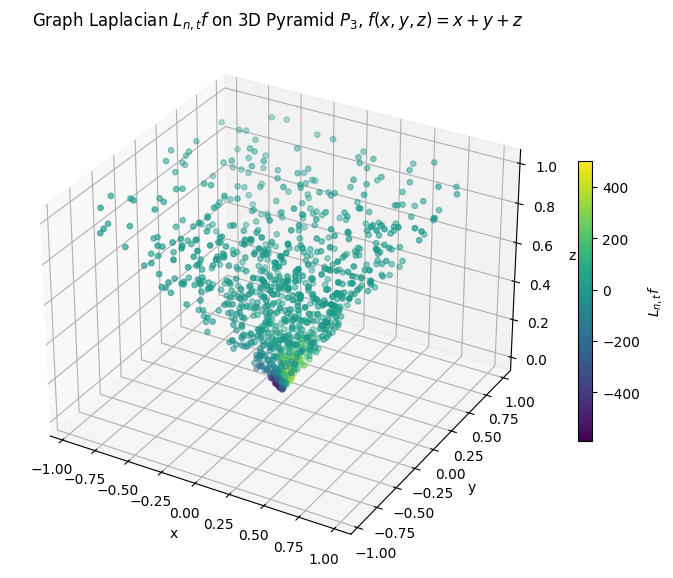

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# -----------------------------
# Parameters
# -----------------------------
n = 1000     # number of points
t = 0.01     # Gaussian kernel bandwidth
d = 3        # ambient dimension
np.random.seed(42)

# -----------------------------
# STEP 1: Sample from Pyramid P_3 using general method
# Pyramid defined as:
#   { (x1, x2, t) | x ∈ [-1,1]^(d-1), t ∈ [0,1], max(|x_i|) <= 1, pt = (t * x, t) }
def sample_pyramid_Pn(n, num_samples=1000):
    points = []
    while len(points) < num_samples:
        x = np.random.uniform(-1, 1, size=(n - 1,))
        if np.max(np.abs(x)) > 1:
            continue
        t_val = np.random.uniform(0, 1)
        pt = np.append(t_val * x, t_val)
        points.append(pt)
    return np.array(points)

X = sample_pyramid_Pn(n=3, num_samples=n)  # Shape: (n, 3)

# -----------------------------
# STEP 2: Define f(x, y, z) = x + y + z
# -----------------------------
f = X[:, 0] + X[:, 1] + X[:, 2]  # Shape: (n,)

# -----------------------------
# STEP 3: Compute Gaussian Weight Matrix W_{n,t}
# -----------------------------
sq_dists = cdist(X, X, 'sqeuclidean')  # Shape: (n, n)
const = 1 / (n * (t ** (d / 2 + 1)))
W = const * np.exp(-sq_dists / t)

# -----------------------------
# STEP 4: Compute Graph Laplacian L_{n,t} f
# -----------------------------
L_f = np.sum(W * (f[:, None] - f[None, :]), axis=1)

# -----------------------------
# STEP 5: Visualize result
# -----------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=L_f, cmap='viridis', s=15)
plt.colorbar(sc, ax=ax, shrink=0.5, label='$L_{n,t} f$')
ax.set_title("Graph Laplacian $L_{n,t} f$ on 3D Pyramid $P_3$, $f(x,y,z)=x+y+z$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def uniform_sample_triangle(A, B, C):
    """
    Samples a single point uniformly from triangle ABC.
    
    A, B, C: tuples or arrays (x, y) representing triangle vertices
    Returns: tuple (x, y) — uniformly sampled point in triangle
    """
    u, v = np.random.rand(2)  # Two uniform numbers in [0, 1)

    # Reflect across diagonal if point is outside triangle (ensures uniformity)
    if u + v > 1:
        u = 1 - u
        v = 1 - v

    # Compute linear combination of triangle vertices
    x = (1 - u - v) * A[0] + u * B[0] + v * C[0]
    y = (1 - u - v) * A[1] + u * B[1] + v * C[1]

    return (x, y)


Loading saved 3D box from 'shapes_points.npy'...


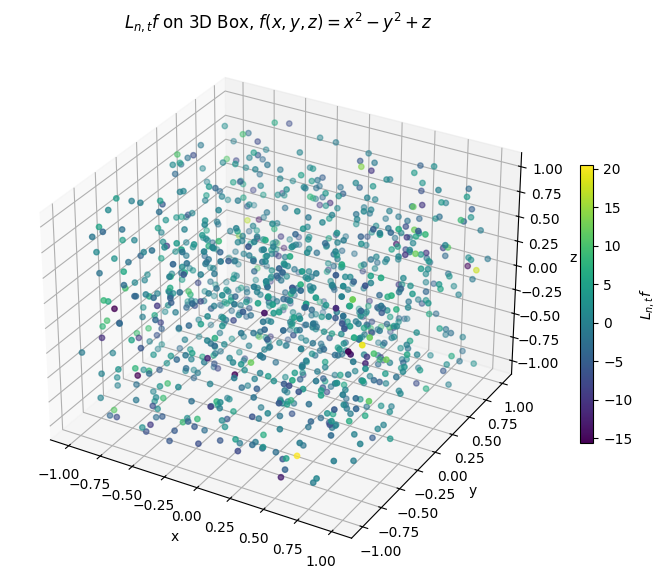

In [5]:
import os

# -----------------------------
# Parameters
# -----------------------------
n = 1000     # number of points
t = 0.01     # Gaussian kernel bandwidth
d = 3        # dimension
filename = 'shapes_points.npy'  # file to save/load sampled points
np.random.seed(42)

# -----------------------------
# STEP 1: Sample or Load 3D Box
# -----------------------------
def sample_box_3d(n):
    return np.random.uniform(-1, 1, size=(n, 3))

if os.path.exists(filename):
    print(f"Loading saved 3D box from '{filename}'...")
    X = np.load(filename)
else:
    print("Sampling new 3D box points...")
    X = sample_box_3d(n)
    np.save(filename, X)

# -----------------------------
# STEP 2: Define f(x, y, z) = x² - y² + z
# -----------------------------
f = X[:, 0]**2 - X[:, 1]**2 + X[:, 2]

# -----------------------------
# STEP 3: Compute Gaussian Weight Matrix W_{n,t}
# -----------------------------
sq_dists = cdist(X, X, 'sqeuclidean')  # Shape: (n, n)
const = 1 / (n * (t ** (d / 2 + 1)))
W = const * np.exp(-sq_dists / t)

# -----------------------------
# STEP 4: Compute Graph Laplacian L_{n,t} f
# -----------------------------
L_f = np.sum(W * (f[:, None] - f[None, :]), axis=1)

# -----------------------------
# STEP 5: Visualize result
# -----------------------------
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=L_f, cmap='viridis', s=15)
plt.colorbar(sc, ax=ax, shrink=0.5, label='$L_{n,t} f$')
ax.set_title(r"$L_{n,t} f$ on 3D Box, $f(x,y,z)=x^2 - y^2 + z$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()


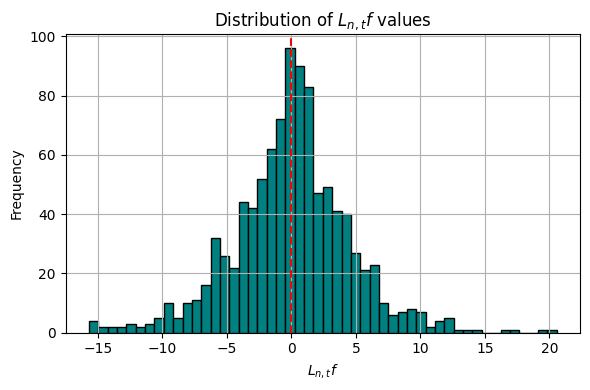

L_f mean: -0.00000, std: 4.62231


In [4]:
# Histogram of graph Laplacian values
plt.figure(figsize=(6, 4))
plt.hist(L_f, bins=50, color='teal', edgecolor='k')
plt.title("Distribution of $L_{n,t} f$ values")
plt.xlabel("$L_{n,t} f$")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute statistics
print(f"L_f mean: {np.mean(L_f):.5f}, std: {np.std(L_f):.5f}")
